In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings("ignore")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-global-music-dataset-20092025/track_data_final.csv
/kaggle/input/spotify-global-music-dataset-20092025/spotify_data clean.csv


## **Reading Data**


In [2]:
df = pd.read_csv('/kaggle/input/spotify-global-music-dataset-20092025/spotify_data clean.csv')
df

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8577,0AQquaENerGps8BQmbPw14,Big Iron,1,71,False,Marty Robbins,60,626733,"classic country, outlaw country",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,1959-06-30,15,album,3.92
8578,4f8hBeMXMvssn6HtFAtblo,El Paso,10,64,False,Marty Robbins,61,626733,"classic country, outlaw country",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,1959-06-30,15,album,4.32
8579,0Vy7wsXNFrbNc6UTWoScnM,Over the Rainbow,5,8,False,The Mystics,27,18184,doo-wop,2ifB9Xjp9DdpqLlYlY60QW,Presenting The Mystics,1959-02-11,9,compilation,2.28
8580,760clbeDBWmBsBLbszWuNZ,I'm A Man,2,55,False,Bo Diddley,44,333376,"blues, classic blues, rock and roll, rockabilly",1cbtDEwxCjMhglb49OgNBR,Bo Diddley,1958-01-01,12,album,2.74


## **Exploring Dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8582 entries, 0 to 8581
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            8582 non-null   object 
 1   track_name          8582 non-null   object 
 2   track_number        8582 non-null   int64  
 3   track_popularity    8582 non-null   int64  
 4   explicit            8582 non-null   bool   
 5   artist_name         8579 non-null   object 
 6   artist_popularity   8582 non-null   int64  
 7   artist_followers    8582 non-null   int64  
 8   artist_genres       5221 non-null   object 
 9   album_id            8582 non-null   object 
 10  album_name          8582 non-null   object 
 11  album_release_date  8582 non-null   object 
 12  album_total_tracks  8582 non-null   int64  
 13  album_type          8582 non-null   object 
 14  track_duration_min  8582 non-null   float64
dtypes: bool(1), float64(1), int64(5), object(8)
memory usag

In [4]:
df.describe()

,track_number,track_popularity,artist_popularity,artist_followers,album_total_tracks,track_duration_min
count,8582.000000,8582.000000,8582.000000,8.582000e+03,8582.000000,8582.000000
mean,5.772547,52.356211,69.730016,2.403472e+07,13.789443,3.492805
std,6.052792,23.816076,19.645979,3.803180e+07,11.887131,1.057970
min,1.000000,0.000000,0.000000,0.000000e+00,1.000000,0.070000
25%,1.000000,39.000000,60.000000,4.623200e+05,6.000000,2.880000
50%,4.000000,58.000000,74.000000,6.105547e+06,13.000000,3.445000
75%,9.000000,71.000000,84.000000,2.725255e+07,17.000000,3.990000
max,102.000000,99.000000,100.000000,1.455421e+08,181.000000,13.510000


In [5]:
df.shape

(8582, 15)

In [6]:
df.columns.tolist()

['track_id',
 'track_name',
 'track_number',
 'track_popularity',
 'explicit',
 'artist_name',
 'artist_popularity',
 'artist_followers',
 'artist_genres',
 'album_id',
 'album_name',
 'album_release_date',
 'album_total_tracks',
 'album_type',
 'track_duration_min']

### **Handling NULL Values**

In [7]:
df.isna().sum()

track_id                 0
track_name               0
track_number             0
track_popularity         0
explicit                 0
artist_name              3
artist_popularity        0
artist_followers         0
artist_genres         3361
album_id                 0
album_name               0
album_release_date       0
album_total_tracks       0
album_type               0
track_duration_min       0
dtype: int64

In [8]:
df[df["artist_name"].isna()]

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
1807,2NbsBSshscKIPRG3kwBbfo,Never Felt So Alone,1,68,False,NaN,0,0,NaN,33JqWTchq6piiQddrRIvJX,Never Felt So Alone,2023-04-07,1,single,2.66
6517,3QhfFRPkhPCR1RMJWV1gde,Radio,8,65,True,NaN,0,0,NaN,0Dt3FbpMQwjoT5KNAw0IXR,Born To Die – Paradise Edition (Special Version),2012-01-01,24,album,3.57
6679,5EhZC8GFOVXrpiUW22jncE,Urban Twilight,4,30,False,NaN,0,0,NaN,1Cog6aZ6NwnJiuINc0LQEU,Darkbloom,2011-04-18,5,single,4.26


In [9]:
df[df["track_name"]=="Urban Twilight"]

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
6679,5EhZC8GFOVXrpiUW22jncE,Urban Twilight,4,30,False,NaN,0,0,NaN,1Cog6aZ6NwnJiuINc0LQEU,Darkbloom,2011-04-18,5,single,4.26


In [10]:
df[df["track_name"]=="Never Felt So Alone"]

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
1807,2NbsBSshscKIPRG3kwBbfo,Never Felt So Alone,1,68,False,NaN,0,0,NaN,33JqWTchq6piiQddrRIvJX,Never Felt So Alone,2023-04-07,1,single,2.66


In [11]:
df[df["track_name"]=="Radio"]

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
6516,3taCbWWTilb7eNMsAzOBq4,Radio,8,72,True,Lana Del Rey,88,51847587,"alternative pop, indie pop",5VoeRuTrGhTbKelUfwymwu,Born To Die - The Paradise Edition,2012-01-01,23,album,3.57
6517,3QhfFRPkhPCR1RMJWV1gde,Radio,8,65,True,NaN,0,0,NaN,0Dt3FbpMQwjoT5KNAw0IXR,Born To Die – Paradise Edition (Special Version),2012-01-01,24,album,3.57
6737,77RtpoGrwIbNh1E8rRCCX7,Radio,8,47,True,Lana Del Rey,88,51773650,"alternative pop, indie pop",0W4ETIlyIonfCfAykj3K59,Born To Die (Deluxe Version),2011-01-01,15,album,3.57


In [12]:
df.loc[df["track_name"] == "Radio", "artist_name"] == "Lana Del Rey"

6516     True
6517    False
6737     True
Name: artist_name, dtype: bool

In [13]:
# The method call df['column_name'].mode()[0] calls the method mode() on your Dataframe df and then takes the first entry with it via [0].


df["artist_name"] = df["artist_name"].fillna(df["artist_name"].mode()[0])

In [14]:
# The method call df['column_name'].mode()[0] calls the method mode() on your Dataframe df and then takes the first entry with it via [0].

df["artist_genres"] = df["artist_genres"].fillna(df["artist_genres"].mode()[0])

In [15]:
df.isna().sum()

track_id              0
track_name            0
track_number          0
track_popularity      0
explicit              0
artist_name           0
artist_popularity     0
artist_followers      0
artist_genres         0
album_id              0
album_name            0
album_release_date    0
album_total_tracks    0
album_type            0
track_duration_min    0
dtype: int64

## **Enhancing Dataset**

In [16]:
df

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,soundtrack,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8577,0AQquaENerGps8BQmbPw14,Big Iron,1,71,False,Marty Robbins,60,626733,"classic country, outlaw country",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,1959-06-30,15,album,3.92
8578,4f8hBeMXMvssn6HtFAtblo,El Paso,10,64,False,Marty Robbins,61,626733,"classic country, outlaw country",3kQpBS26lAj0A0VGl1snRl,Gunfighter Ballads And Trail Songs,1959-06-30,15,album,4.32
8579,0Vy7wsXNFrbNc6UTWoScnM,Over the Rainbow,5,8,False,The Mystics,27,18184,doo-wop,2ifB9Xjp9DdpqLlYlY60QW,Presenting The Mystics,1959-02-11,9,compilation,2.28
8580,760clbeDBWmBsBLbszWuNZ,I'm A Man,2,55,False,Bo Diddley,44,333376,"blues, classic blues, rock and roll, rockabilly",1cbtDEwxCjMhglb49OgNBR,Bo Diddley,1958-01-01,12,album,2.74


In [17]:
# Convert release_date object to datetime

df['album_release_date'] = pd.to_datetime(df['album_release_date'], dayfirst=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8582 entries, 0 to 8581
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   track_id            8582 non-null   object        
 1   track_name          8582 non-null   object        
 2   track_number        8582 non-null   int64         
 3   track_popularity    8582 non-null   int64         
 4   explicit            8582 non-null   bool          
 5   artist_name         8582 non-null   object        
 6   artist_popularity   8582 non-null   int64         
 7   artist_followers    8582 non-null   int64         
 8   artist_genres       8582 non-null   object        
 9   album_id            8582 non-null   object        
 10  album_name          8582 non-null   object        
 11  album_release_date  8582 non-null   datetime64[ns]
 12  album_total_tracks  8582 non-null   int64         
 13  album_type          8582 non-null   object      

In [18]:
# Rename album_type column 

df.rename(columns={"album_type": "release_format"}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8582 entries, 0 to 8581
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   track_id            8582 non-null   object        
 1   track_name          8582 non-null   object        
 2   track_number        8582 non-null   int64         
 3   track_popularity    8582 non-null   int64         
 4   explicit            8582 non-null   bool          
 5   artist_name         8582 non-null   object        
 6   artist_popularity   8582 non-null   int64         
 7   artist_followers    8582 non-null   int64         
 8   artist_genres       8582 non-null   object        
 9   album_id            8582 non-null   object        
 10  album_name          8582 non-null   object        
 11  album_release_date  8582 non-null   datetime64[ns]
 12  album_total_tracks  8582 non-null   int64         
 13  release_format      8582 non-null   object      

In [19]:
df['release_format'].value_counts()

release_format
album          5856
single         2219
compilation     507
Name: count, dtype: int64

In [20]:
# Remove unnecessary ID columns

df.drop(columns=['track_id', 'album_id'], inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8582 entries, 0 to 8581
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   track_name          8582 non-null   object        
 1   track_number        8582 non-null   int64         
 2   track_popularity    8582 non-null   int64         
 3   explicit            8582 non-null   bool          
 4   artist_name         8582 non-null   object        
 5   artist_popularity   8582 non-null   int64         
 6   artist_followers    8582 non-null   int64         
 7   artist_genres       8582 non-null   object        
 8   album_name          8582 non-null   object        
 9   album_release_date  8582 non-null   datetime64[ns]
 10  album_total_tracks  8582 non-null   int64         
 11  release_format      8582 non-null   object        
 12  track_duration_min  8582 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(1), int64

In [22]:
df.head(n=15)

,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_name,album_release_date,album_total_tracks,release_format,track_duration_min
0,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",OMG!,2025-10-31,1,single,3.07
2,Hard 2 Find,1,4,True,Riff Raff,48,193302,soundtrack,Hard 2 Find,2025-10-31,1,single,2.55
3,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,come closer / ride me like a harley,2025-10-30,2,single,2.39
5,BLEED,1,2,False,Minzie,46,7218,dark r&b,BLEED,2025-10-30,3,single,2.76
6,Te Procuro na Cidade,1,20,False,AZERDK,30,1657,soundtrack,Te Procuro na Cidade,2025-10-30,1,single,4.12
7,come closer,1,27,False,Rumelis,49,8802,dark r&b,come closer / ride me like a harley,2025-10-30,2,single,2.53
8,Cupido Vagabundo,1,16,False,Toni dos Anjos,6,475,soundtrack,Cupido Vagabundo,2025-10-30,2,single,2.92
9,LET’S GO!,1,33,True,PsychoYP,48,154802,"nigerian drill, alté, afro adura, afrobeats, a...",LET’S GO!,2025-10-28,1,single,2.40


## **Data Visualisation**

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

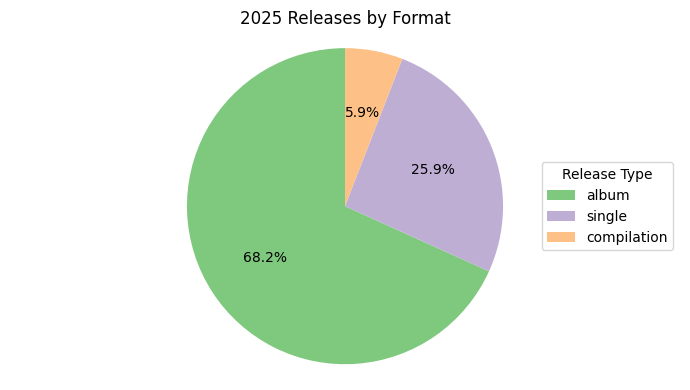

In [24]:
plt.figure(figsize=(7, 4))
format_counts = df['release_format'].value_counts()
plt.pie(
    format_counts,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Accent.colors
)
plt.title('2025 Releases by Format')
plt.axis('equal')
plt.legend(format_counts.index,
          title="Release Type",
          loc='center right')
plt.tight_layout()
plt.show()

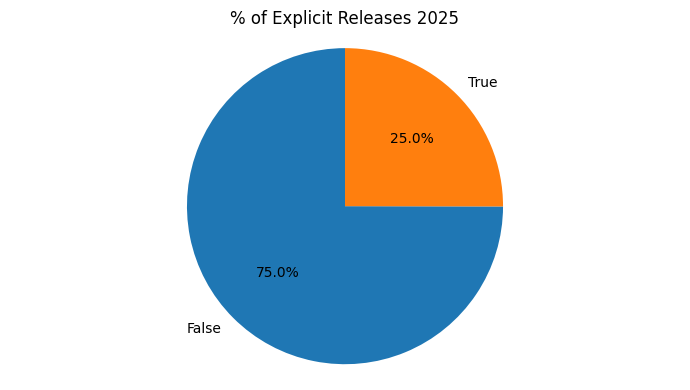

In [25]:
plt.figure(figsize=(7, 4))
explicit_counts = df['explicit'].value_counts()
plt.pie(
    explicit_counts,
    labels=explicit_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('% of Explicit Releases 2025')
plt.axis('equal')
plt.tight_layout()
plt.show()

### **Top 10**

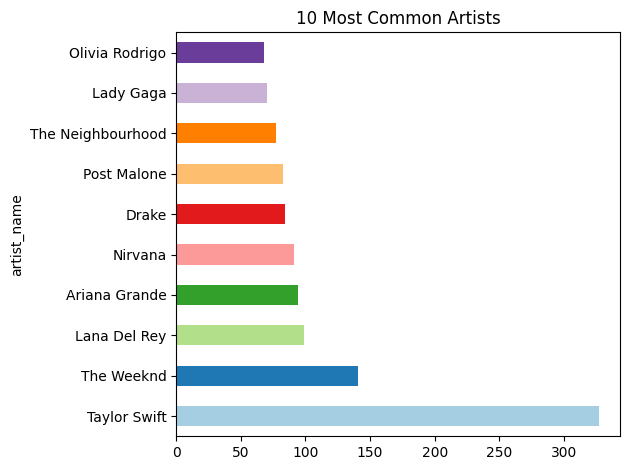

In [26]:
df['artist_name'].value_counts().nlargest(10).plot(kind='barh', color=plt.cm.Paired.colors)

plt.title('10 Most Common Artists')
plt.tight_layout()
plt.show()

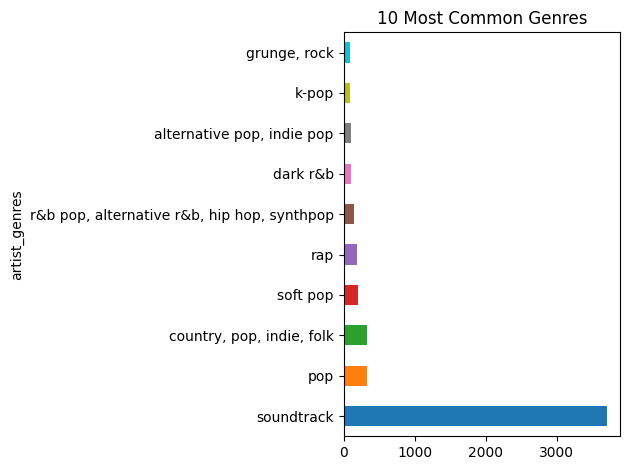

In [27]:
df['artist_genres'].value_counts().nlargest(10).plot(kind='barh', color=plt.cm.tab10.colors)

plt.title('10 Most Common Genres')
plt.tight_layout()
plt.show()

In [28]:

ratings_counts = df.groupby('artist_name').agg(count=('track_name', 'count'), avg_track_rating=('track_popularity', 'mean')).reset_index()

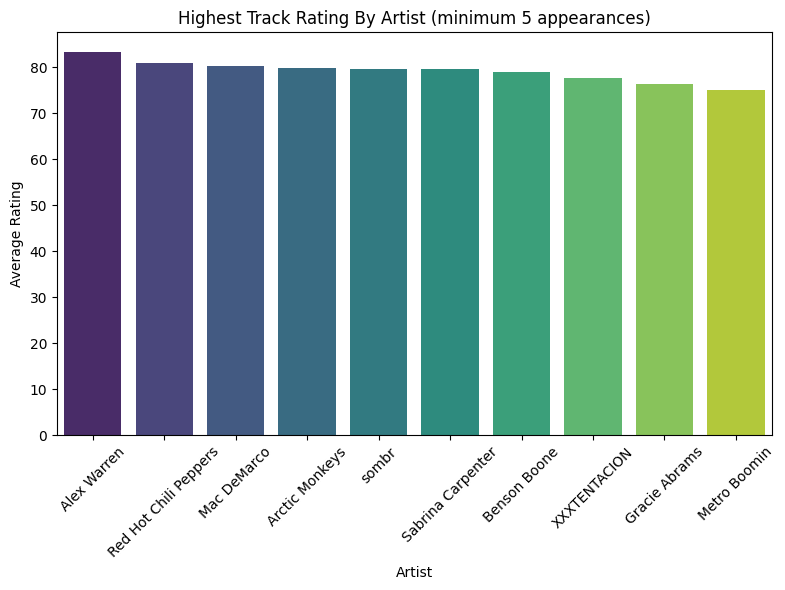

In [29]:
top_10_artists_tracks = ratings_counts[ratings_counts['count'] >= 5].sort_values(by='avg_track_rating', ascending=False).head(10)
plt.figure(figsize=(8,6))

sns.barplot(x='artist_name', y='avg_track_rating', data=top_10_artists_tracks, palette='viridis')

plt.title('Highest Track Rating By Artist (minimum 5 appearances)')
plt.xlabel('Artist')
plt.xticks(rotation=45)
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

### **Bottom 10**

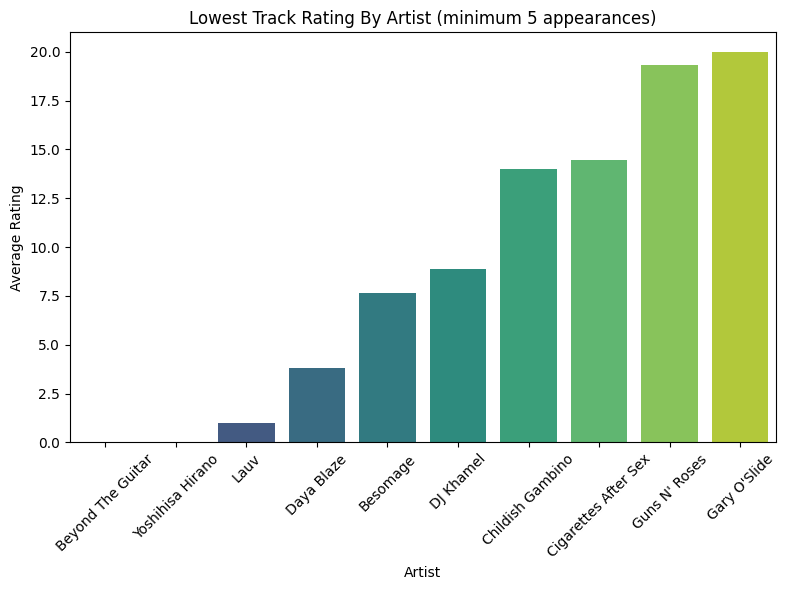

In [30]:
bottom_10_artists_tracks = ratings_counts[ratings_counts['count'] >= 5].sort_values(by='avg_track_rating', ascending=True).head(10)
plt.figure(figsize=(8,6))

sns.barplot(x='artist_name', y='avg_track_rating', data=bottom_10_artists_tracks, palette='viridis')

plt.title('Lowest Track Rating By Artist (minimum 5 appearances)')
plt.xlabel('Artist')
plt.xticks(rotation=45)
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

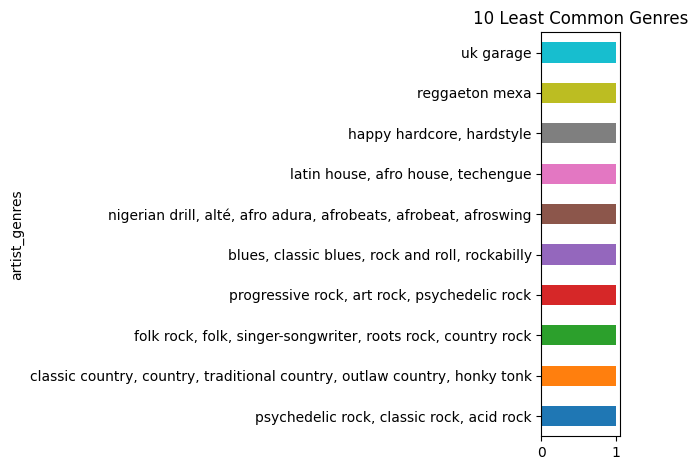

In [31]:
df['artist_genres'].value_counts().nsmallest(10).plot(kind='barh', color=plt.cm.tab10.colors)

plt.title('10 Least Common Genres')
plt.tight_layout()
plt.show()

### **Frequency Distributions**

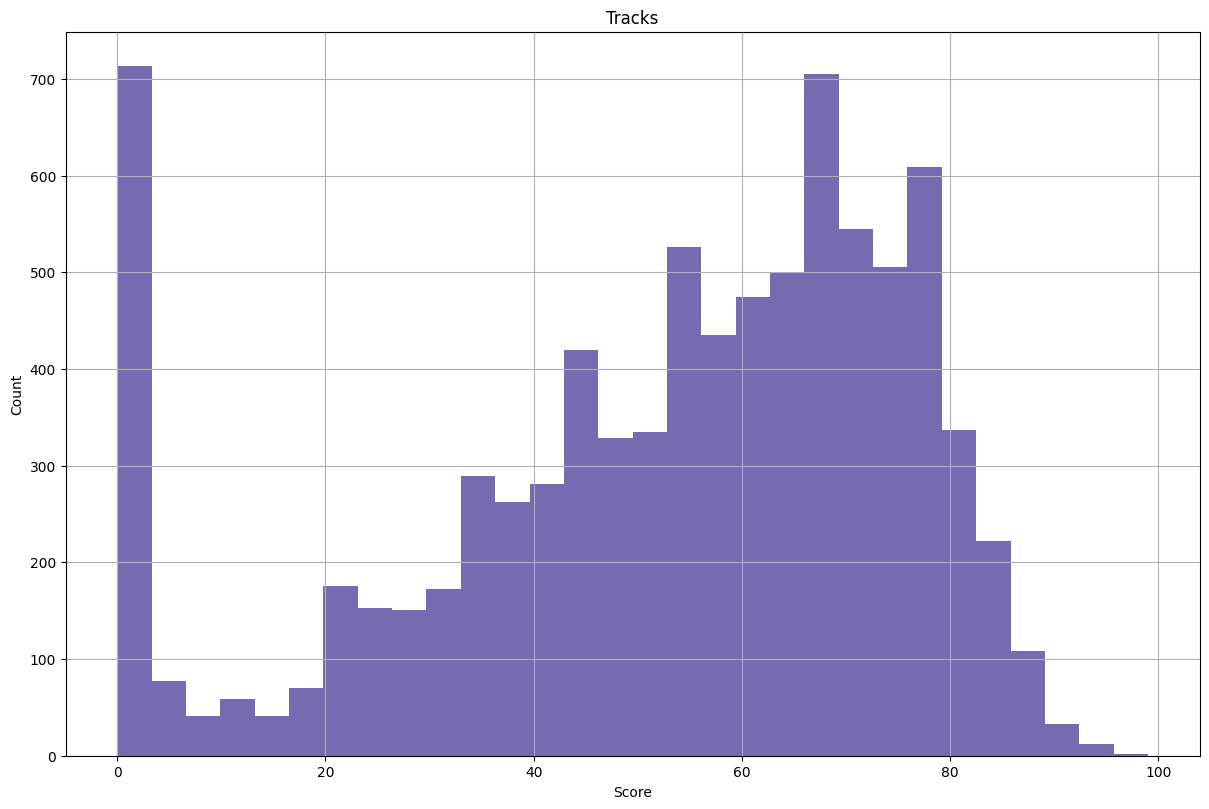

In [32]:
df['track_popularity'].hist(bins=30, figsize=(12,8),color="#756bb1")

plt.title("Tracks")
plt.tight_layout()
plt.ylabel("Count")
plt.xlabel("Score")
plt.show()

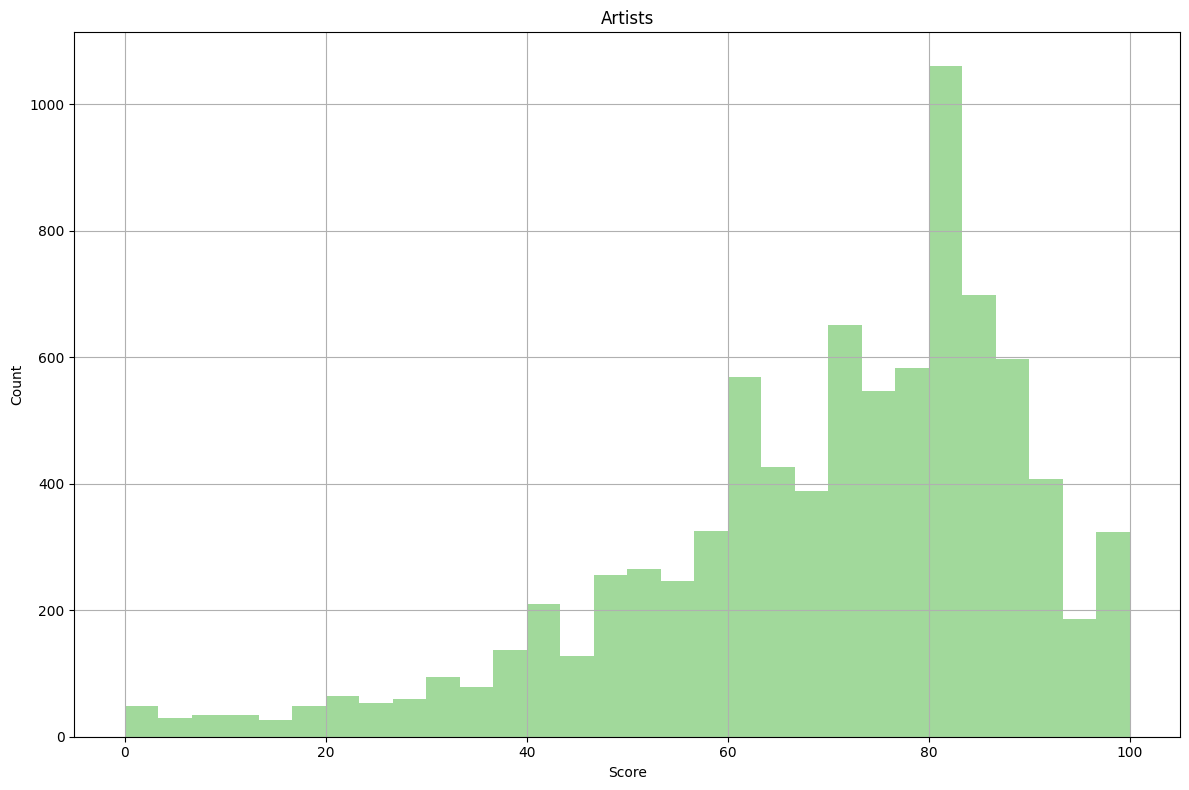

In [33]:
df['artist_popularity'].hist(bins=30, figsize=(12,8),color="#a1d99b")

plt.title("Artists")
plt.ylabel("Count")
plt.xlabel("Score")
plt.tight_layout()
plt.show()

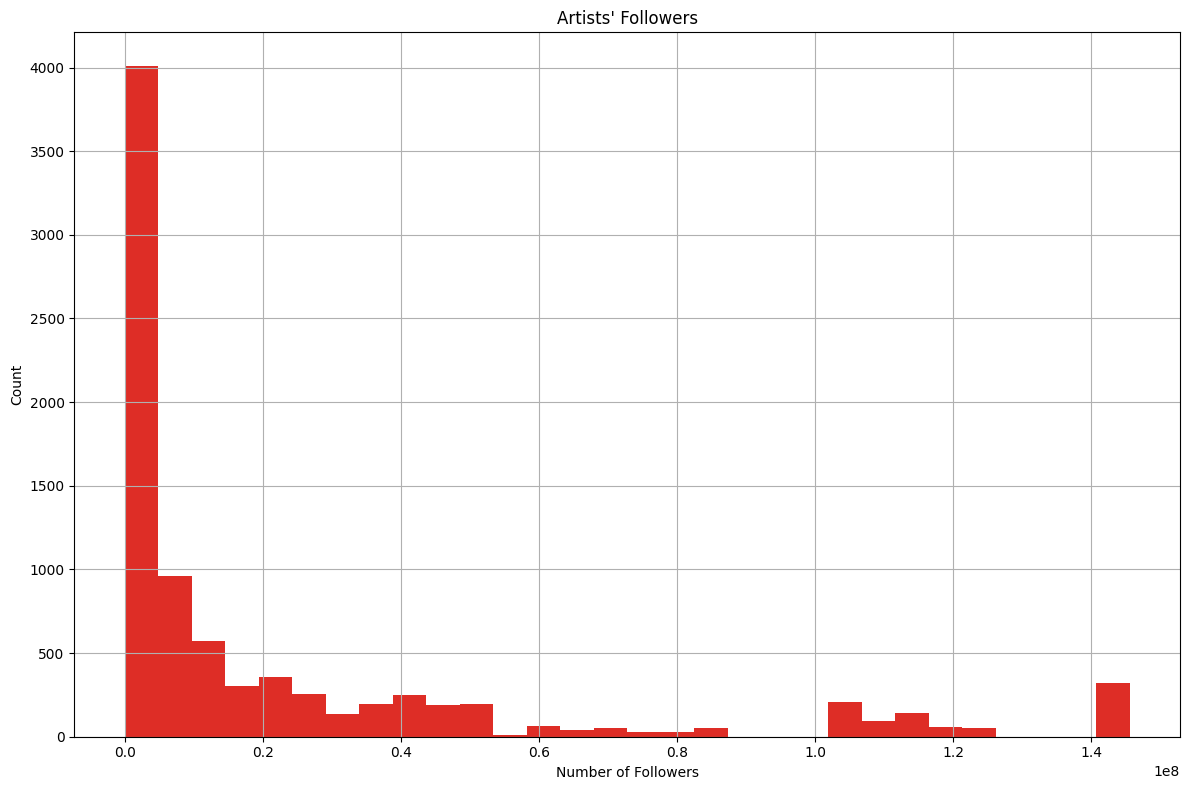

In [34]:
df['artist_followers'].hist(bins=30, figsize=(12,8),color="#de2d26")

plt.title("Artists' Followers")
plt.ylabel("Count")
plt.xlabel("Number of Followers")
plt.tight_layout()
plt.show()

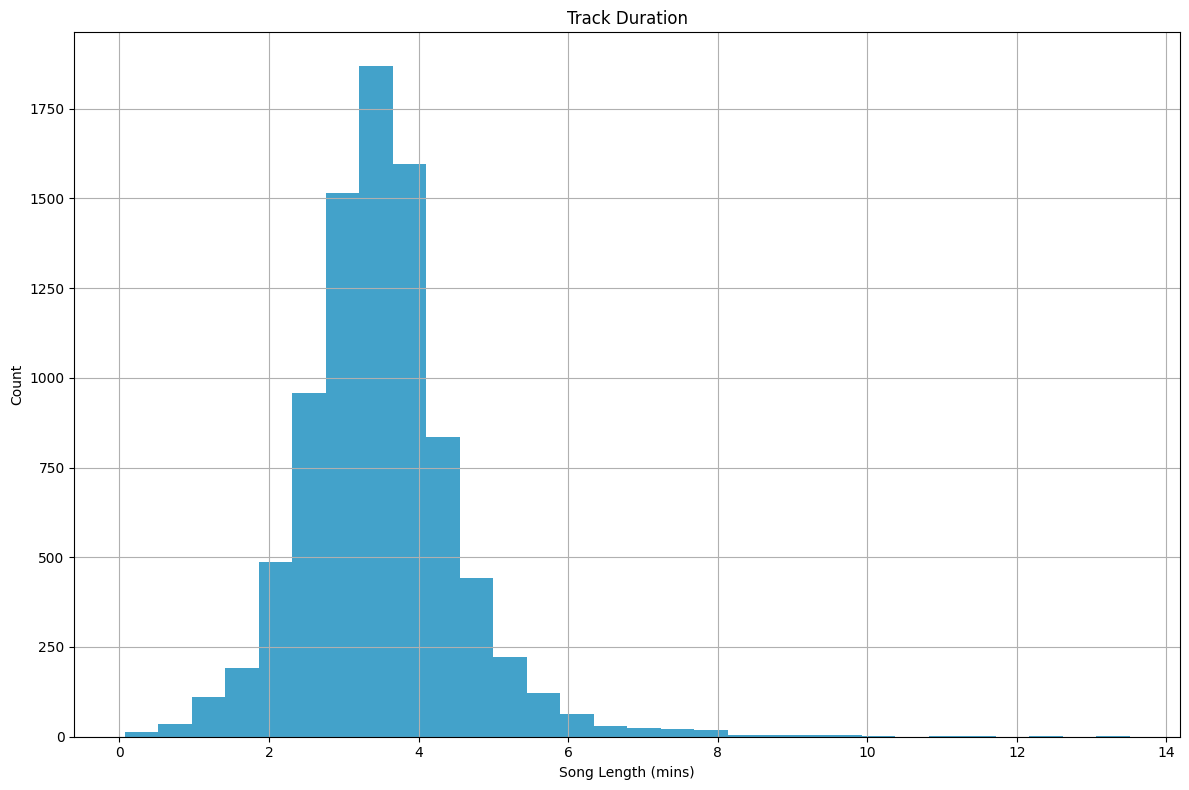

In [35]:
df['track_duration_min'].hist(bins=30, figsize=(12,8),color="#43a2ca")

plt.title("Track Duration")
plt.ylabel("Count")
plt.xlabel("Song Length (mins)")
plt.tight_layout()
plt.show()